In [3]:
import numpy as np #for manipulating arrays in numpy format for faster computation
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt # for plotting graphs in matplotlib format 
from sklearn.preprocessing import StandardScaler #for standardizing the data
from imblearn.over_sampling import RandomOverSampler #for overSampling the minority class

In [4]:
# Load the DataSet and Display the first 5 rows 
#df = pd.read_csv("magic04.data")
# df.head(5)

In [5]:
# Associate the columns with respective names 
col=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=col)
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
# Class column has two values g and h. We need to convert them to 0 and 1
df["class"].unique()

array(['g', 'h'], dtype=object)

In [7]:
# Convert the class column to 0 and 1
df["class"] =( df["class"] == 'g').astype(int)  

In [8]:
# Show the Updated DataSet 
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [9]:
print(df["class"].unique())  # Ensure both 0 and 1 exist

[1 0]


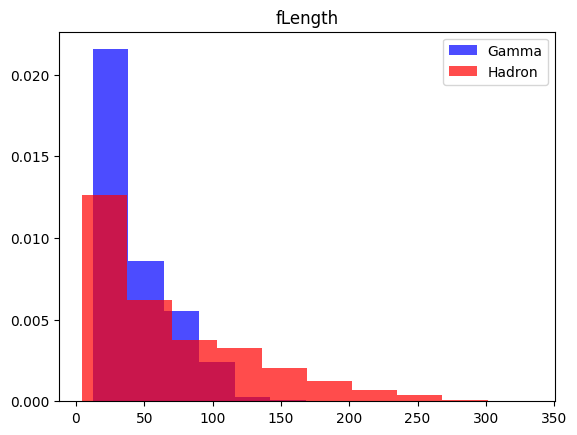

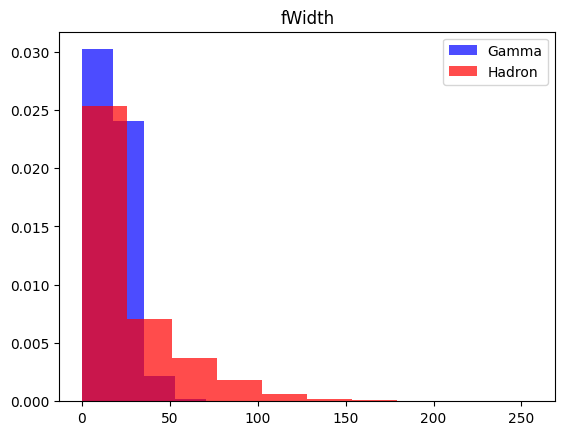

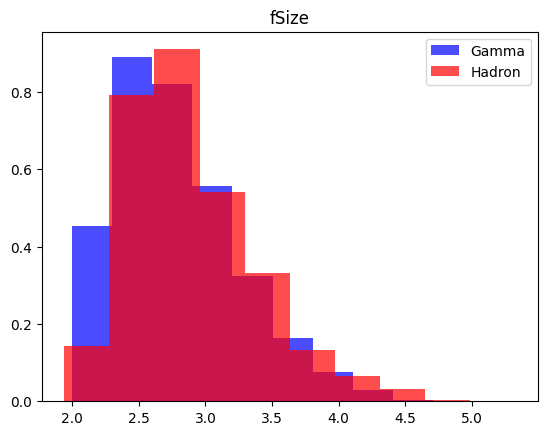

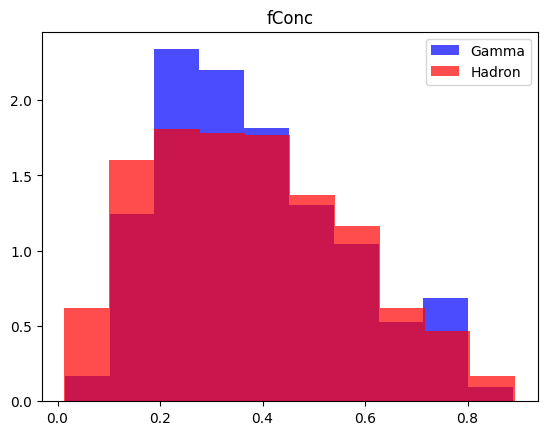

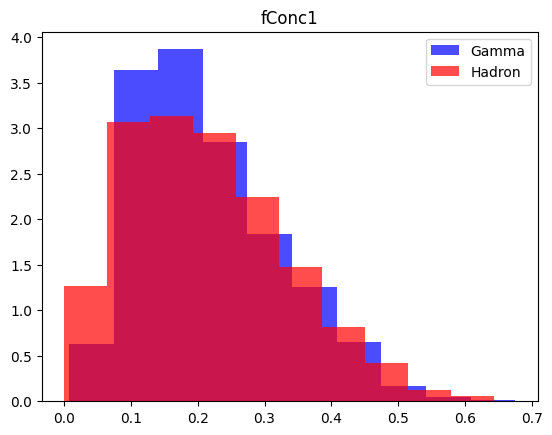

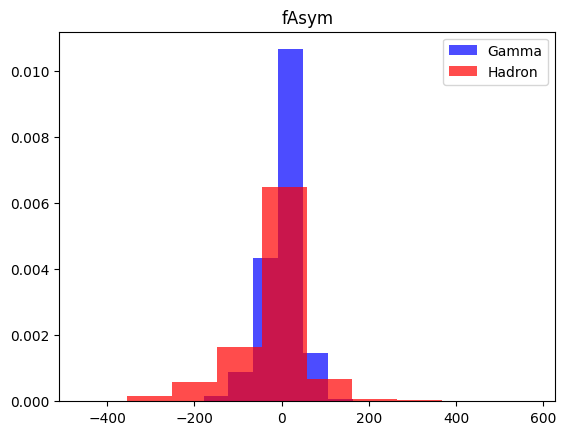

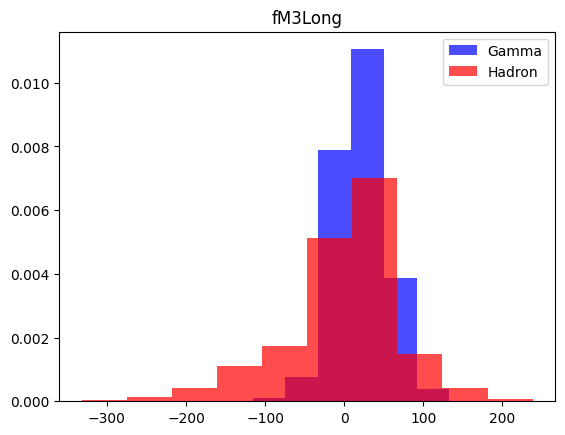

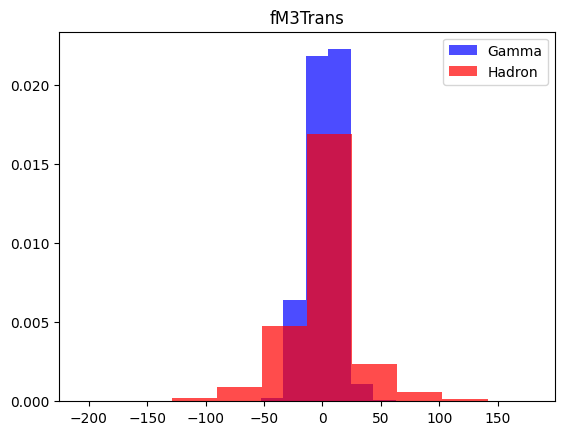

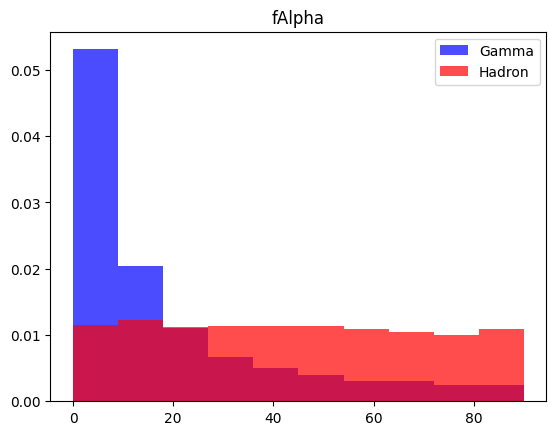

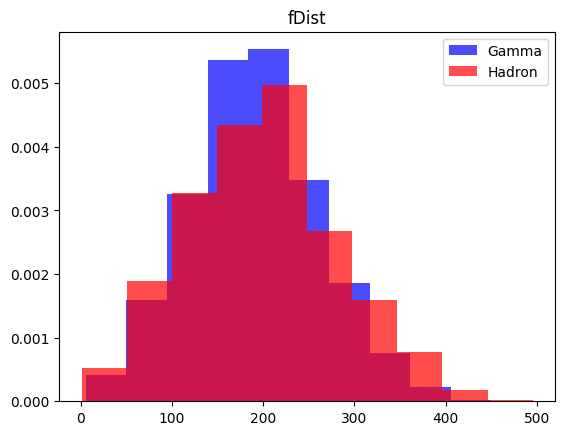

In [10]:
# Display the Probability Distribution for each feature
for label in col[:-1]: # All the columns except the last one
    plt.hist(df[df["class"]==1][label],color='blue',label='Gamma',alpha=0.7,density=True) #Alpha represents the transparency of the plot
    plt.hist(df[df["class"]==0][label],color='red',label='Hadron',alpha=0.7,density=True) #density=True normalizes the data meaning the area under the curve is 1
    plt.title(label)
    plt.legend()
    plt.show()

### Preparing Data 

In [11]:
### Train Validation and Test DataSets
Train, Valid, Test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) # 60% Train, 20% Validation and 20% Test
# frac=1 means the entire dataset is used => shuffles the rows of the dataframe df randomly.


C:\Users\Hadil sghair\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
# The values in the dataset are in different ranges. We need to normalize them to a common range => ⚠️ Scale the data
# This is a Function that scales the dataset
# The function takes in a dataframe and a boolean value OverSample which is False by default

def Scale_DataSet(dataframe, OverSample=False): 
    X=dataframe[dataframe.columns[:-1]].values # Extract the features's values from the dataframe
    Y=dataframe[dataframe.columns[-1]].values # Extract the target's values from the dataframe
    scaler=StandardScaler() # Create a StandardScaler object
    X=scaler.fit_transform(X) 
    if OverSample:
        ros=RandomOverSampler() # Create a RandomOverSampler object
        X,Y=ros.fit_resample(X,Y) # OverSample the minority class
    data=np.hstack((X,np.reshape(Y,(-1,1)))) # Stack the features and target values together . the reshape is to ensure the target values are in the right shape
    return data, X, Y
    

In [13]:
print("Number of Gamma in Train:",len(Train[Train["class"]==1])) # Number of Gamma in the Training Set
print("Number of Hadron in Train:",len(Train[Train["class"]==0])) # Number of Hadron in the Training Set


Number of Gamma in Train: 7477
Number of Hadron in Train: 3935


In [14]:
# Scale / OverSample the Training Set
Train, Train_X,Train_Y=Scale_DataSet(Train,OverSample=True)
Valid, Valid_X,Valid_Y=Scale_DataSet(Valid,OverSample=False) # we don't need to OverSample the Validation and Test Sets
Test, Test_X,Test_Y=Scale_DataSet(Test,OverSample=False)

In [15]:
# Validate the Scaling and OverSampling
#⚠️ we used the len method because the data is in numpy format no longer a dataframe
print("Number of Gamma in Train:", len(Train_Y[Train_Y == 1]))
print("Number of Hadron in Train:", len(Train_Y[Train_Y == 0]))

Number of Gamma in Train: 7477
Number of Hadron in Train: 7477


### K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model=KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(Train_X,Train_Y)

KNeighborsClassifier(n_neighbors=3)

In [18]:
Y_pred=knn_model.predict(Test_X)

In [19]:
Y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [20]:
Test_Y

array([1, 0, 1, ..., 1, 1, 1])

In [21]:
print(classification_report(Test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1365
           1       0.84      0.86      0.85      2439

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB # Gaussian is the most common type of Naive Bayes Classifier

In [23]:
NB_model=GaussianNB()
NB_model=NB_model.fit(Train_X,Train_Y)

In [24]:
Y_pred=NB_model.predict(Test_X)
print(classification_report(Test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.39      0.50      1365
           1       0.73      0.91      0.81      2439

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
LR_MOdel=LogisticRegression()
LR_MOdel=LR_MOdel.fit(Train_X,Train_Y)

In [27]:
Y_pred=LR_MOdel.predict(Test_X)
print(classification_report(Test_Y,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1365
           1       0.83      0.82      0.82      2439

    accuracy                           0.77      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.77      0.78      3804



# Support vector Machines SVM's

In [28]:
from sklearn.svm import SVC

In [29]:
SVC_model=SVC()
SVC_model=SVC_model.fit(Train_X,Train_Y)

In [30]:
y_pred1=SVC_model.predict(Test_X)
print(classification_report(Test_Y,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1365
           1       0.89      0.91      0.90      2439

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



# Neural Networks 

In [31]:
import tensorflow as tf

In [32]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [33]:

# //*? Training the Model the points is to find the best hyperparameters trough trial and error
def model_training(Train_X, Train_Y,learning_Rate, num_nodes, epochs,batch_size,dropout_prob):
  
    NN_Model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)), # 10 is the number of features
        tf.keras.layers.Dropout(dropout_prob), # //! Dropout is a technique where randomly selected neurons are ignored during training to avoid Overfitting
        tf.keras.layers.Dense(num_nodes,activation='relu'), # num_nodes is the number of neurons in the hidden layer
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid') # we are projecting our prediction to be 0 or 1
    ])

    # //! Keep in Mind the number of neurons in the last layer should be equal to the number of classes in the dataset hence sigmoid 0 or 1
    # //INFO ⚠️ Adam is an adaptive learning rate optimization algorithm that's widely used in deep learning.
    # the Learning Rate is how much to update the model weights at each step
    # Binary crossentropy quantifies the gap between predicted probabilities and true binary labels, guiding the model to adjust its weights for improved classification accuracy.   
    NN_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_Rate),loss='binary_crossentropy'
                    ,metrics=['accuracy'])  
    history = NN_Model.fit(
    Train_X,Train_Y,
    epochs=epochs, batch_size=batch_size,validation_split=0.2, verbose=0)
    return  NN_Model, history


16 nodes, 32 samples, 0.1 dropout, 0.01 learning rate


C:\Users\Hadil sghair\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


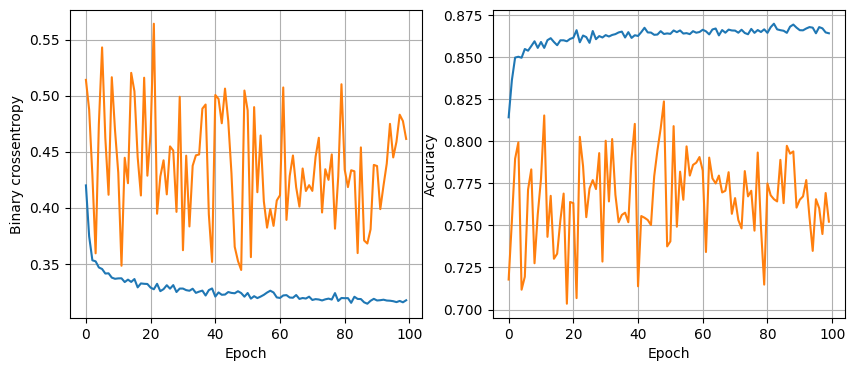

16 nodes, 64 samples, 0.1 dropout, 0.01 learning rate


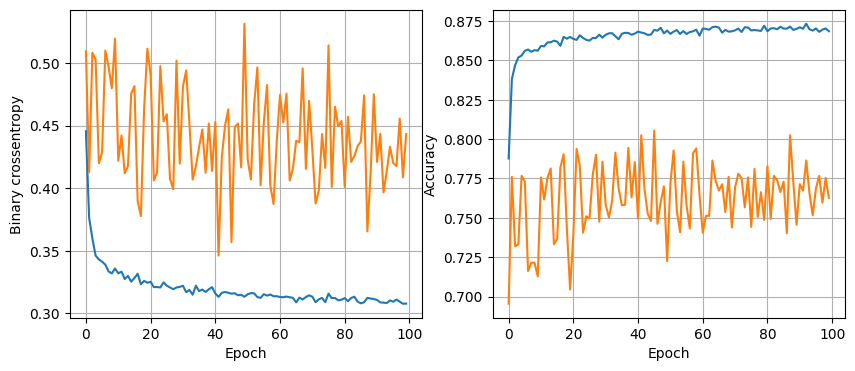

16 nodes, 128 samples, 0.1 dropout, 0.01 learning rate


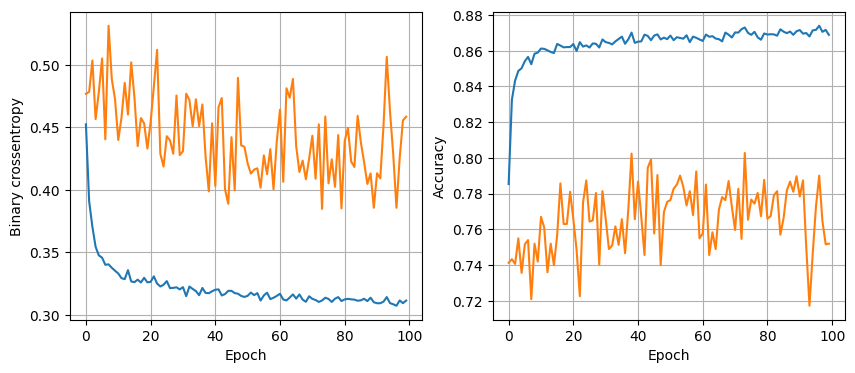

16 nodes, 32 samples, 0.1 dropout, 0.001 learning rate


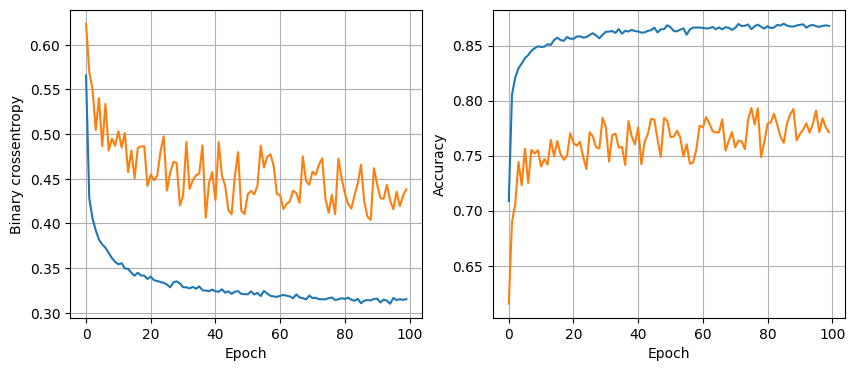

16 nodes, 64 samples, 0.1 dropout, 0.001 learning rate


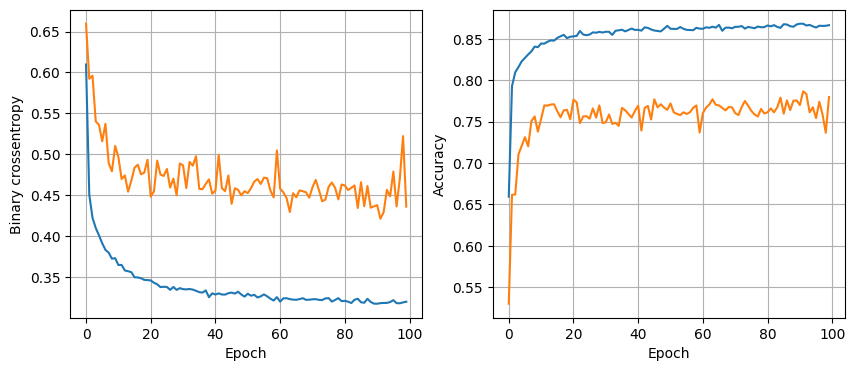

16 nodes, 128 samples, 0.1 dropout, 0.001 learning rate


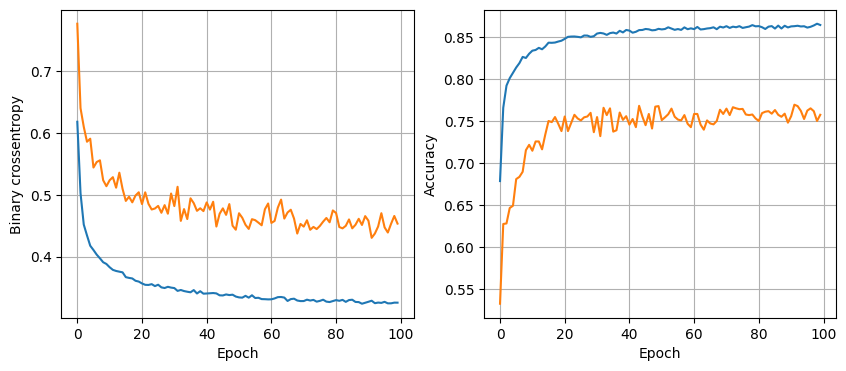

16 nodes, 32 samples, 0.1 dropout, 0.005 learning rate


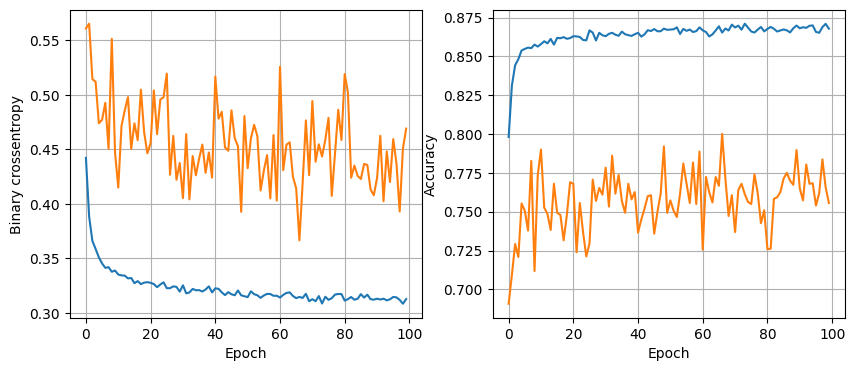

16 nodes, 64 samples, 0.1 dropout, 0.005 learning rate


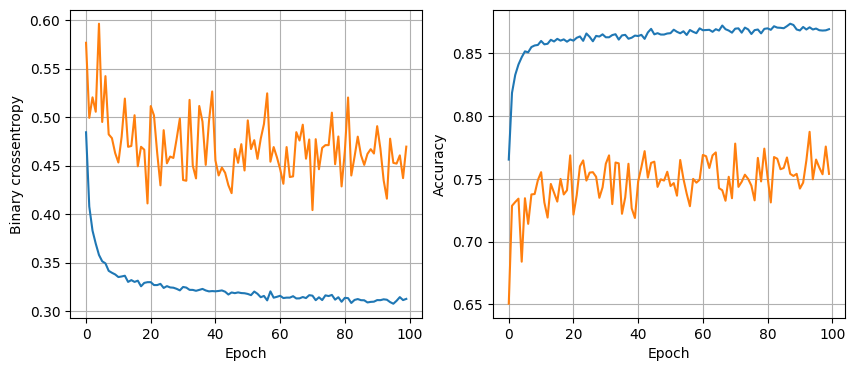

16 nodes, 128 samples, 0.1 dropout, 0.005 learning rate


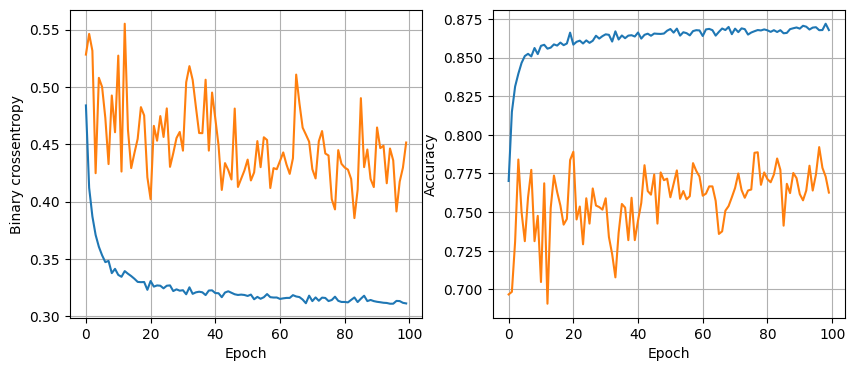

16 nodes, 32 samples, 0.2 dropout, 0.01 learning rate


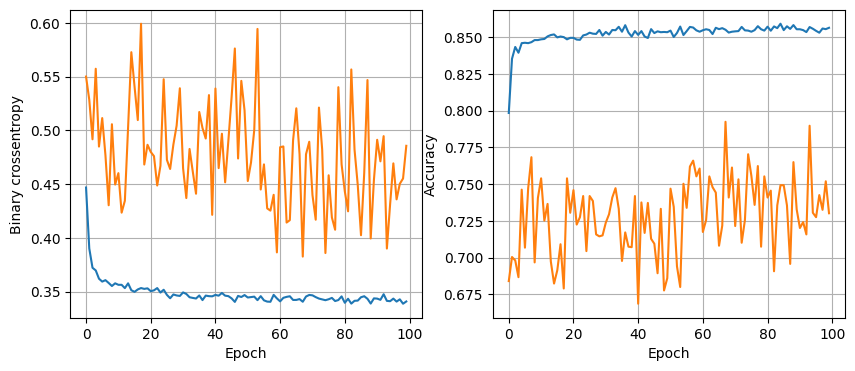

16 nodes, 64 samples, 0.2 dropout, 0.01 learning rate


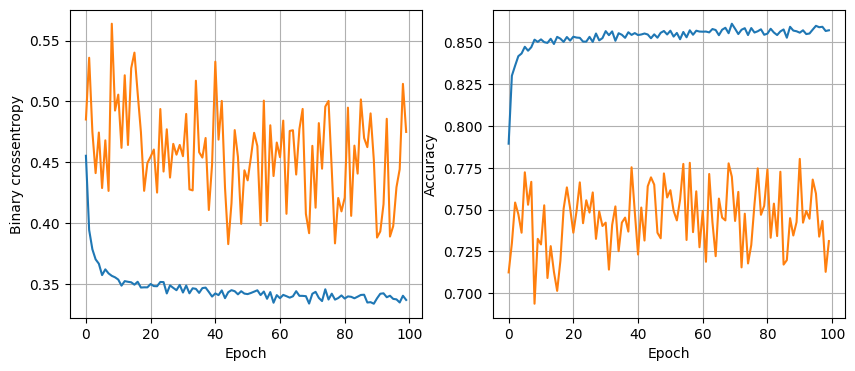

16 nodes, 128 samples, 0.2 dropout, 0.01 learning rate


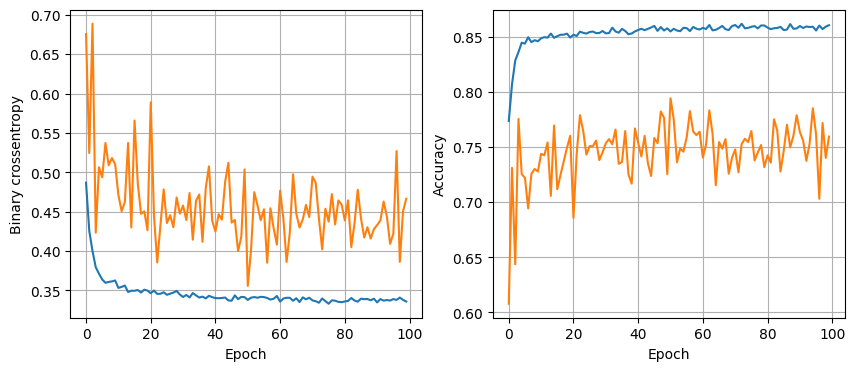

16 nodes, 32 samples, 0.2 dropout, 0.001 learning rate


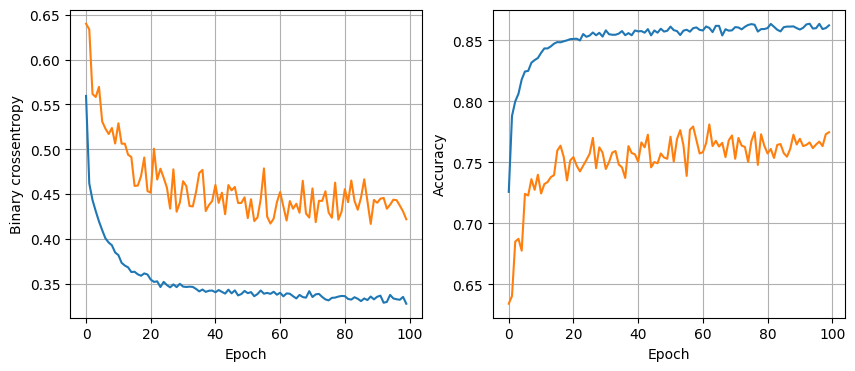

16 nodes, 64 samples, 0.2 dropout, 0.001 learning rate


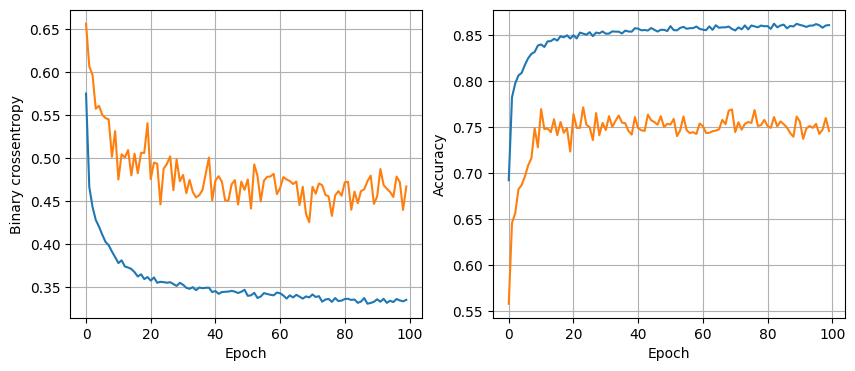

16 nodes, 128 samples, 0.2 dropout, 0.001 learning rate


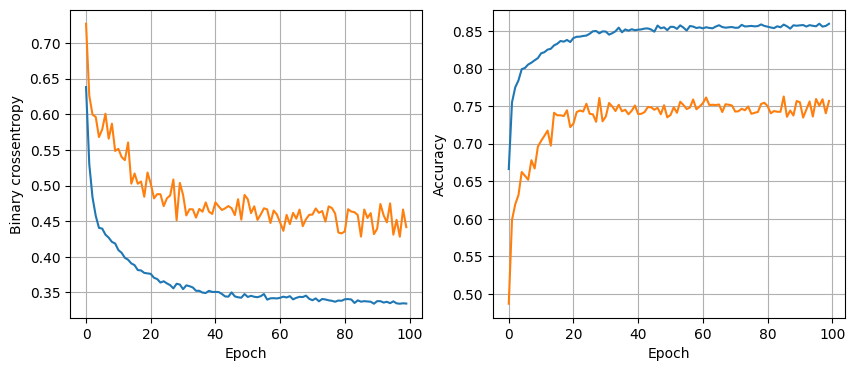

16 nodes, 32 samples, 0.2 dropout, 0.005 learning rate


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0.1, 0.2]:
        for learning_Rate in [0.01, 0.001, 0.005]:
            for batch_size in [32, 64, 128]:  # //*? Batch size is the number of samples processed before the model is updated
                print(f"{num_nodes} nodes, {batch_size} samples, {dropout_prob} dropout, {learning_Rate} learning rate")

                # Train the model
                model, history = model_training(Train_X, Train_Y, learning_Rate, num_nodes, epochs, batch_size, dropout_prob)
                
                # Plot training history
                plot_history(history)

                # Evaluate model on validation set
                val_loss = model.evaluate(Valid_X, Valid_Y, verbose=0)
                
                # Extract first value if evaluate() returns a list
                if isinstance(val_loss, list):
                    val_loss = val_loss[0]

                # Update least validation loss and best model
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [ ]:
y_pred2 = least_loss_model.predict(Test_X)
print(classification_report(Test_Y,y_pred2))

NameError: name 'least_loss_model' is not defined